In [ ]:
# Basic Idea, algorithm
# https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
# Detailed implementation
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
# Updated FEB 2024

import numpy
import pandas
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

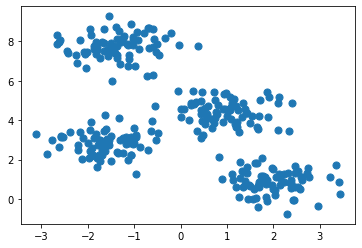

In [ ]:
from sklearn.metrics import pairwise_distances_argmin
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = numpy.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = numpy.array([X[labels == i].mean(0) for i in range(n_clusters)])

        # 2c. Check for convergence
        if numpy.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

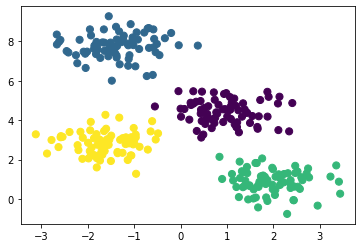

In [ ]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

[0.83685684 2.13635938] [-1.4136581   7.40962324]


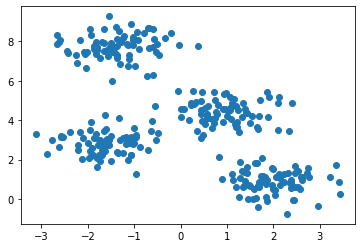

In [ ]:
#make some blobs of data
x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
#the data a series of arrays of two points
print(x[0], x[1])

#show all those points
plt.scatter(x[:,0], x[:,1])
plt.show()

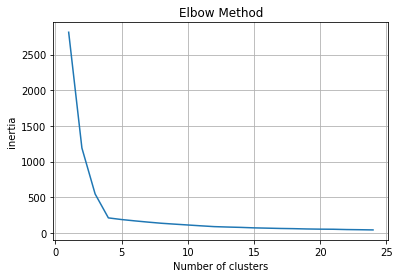

In [ ]:
# How many clusters are there?  (here you can see them, but often you can not..) > Elbow method
# Alternative to elbow method
# https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d

# inertia:
# The K-means algorithm aims to choose centroids that minimise the inertia,
# or within-cluster sum-of-squares criterion
# https://scikit-learn.org/stable/modules/clustering.html

max_clusters = 25
inertia = []

for i in range(1, max_clusters):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, max_clusters), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.grid()
plt.show()

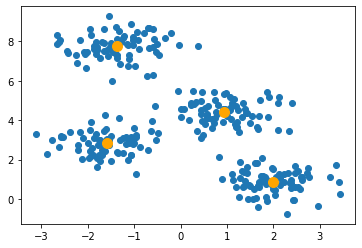

In [ ]:
# Perform the kmeans algorithm with 4 culsters using k-means++ approach during 300 iterations

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1, n_init=1, random_state=0)
pred_y = kmeans.fit_predict(x)

plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='orange')
plt.show()

In [ ]:
# You can also find the elbow analytically
max_clusters = 25
print(inertia)

[2812.137595303234, 1190.7823593643448, 546.8911504626299, 212.00599621083484, 188.82985966318432, 170.03997523951085, 152.71693336661792, 136.82425385087726, 124.44701459780677, 112.58738002972927, 100.69968518602658, 89.57245500828103, 83.8162335467166, 78.92768737869994, 72.30661682232567, 68.22009489032033, 63.92069347992188, 61.120444147132226, 56.72399643715343, 54.04018696181081, 52.80907702979122, 48.52426369311881, 46.321174927884044, 43.47313103163697]


In [ ]:
# Start with some big difference..
difference = 10000

# loop through all the differences to find the smallest difference
for index in range (1, len(inertia) -1):
  current_difference = abs(inertia[index] - inertia[index-1])
  print('this is the current difference and the index: ', current_difference, index)
  if(current_difference < difference):
    difference = current_difference
    best_cluster = index + 1

print('Here is the minimum difference: ', difference)
elbow = max_clusters - best_cluster
print('Here is correspnding elbow / cluster number: ', elbow)


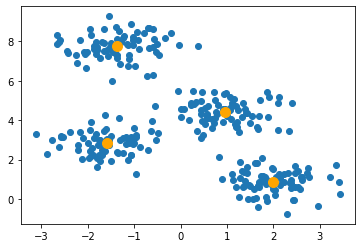

In [ ]:
# Perform the kmeans algorithm with the elbow number found above

kmeans = KMeans(n_clusters=elbow, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x)

plt.scatter(x[:,0], x[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='orange')
plt.show()